#Práctica 2



## Parte B

Para hacer esta parte, teniendo en cuenta los apartados, hemos decidido implementar una clase para agilizar la lectura y el entendimiento del código

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from pickle import NONE
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

class Data:
  def __init__(self,num_instancias):

    self.num_instancias = num_instancias

    #Datos
    self.presion_arterial =None
    self.colesterol = None
    self.frecuencia_deporte = None

    self.x =  None #vector que almacena todos los datos[[pa_1,c_1,f1], [pa_2,c_2,f2] ....]
    self.y =None #Clase a las que pertenece cada instancia

    self.x_normalizado =None
    self.probabilidades =None

    #scaler
    self.scaler = MinMaxScaler()

    #logisticRegresion
    self.modelo = LogisticRegression()



  def generar_datos(self):

    # Generar presión arterial sistólica (distribución normal con valores entre 70 y 180)
    self.presion_arterial = np.random.normal(loc=110, scale=15, size=self.num_instancias)
    self.presion_arterial = np.clip(self.presion_arterial, 70, 180)

    # Generar colesterol (distribución normal con valores entre 120 y 250)
    self.colesterol = np.random.normal(loc=170, scale=30, size=self.num_instancias)
    self.colesterol = np.clip(self.colesterol, 120, 250)

    #Generamos frecuencia de deporte
    self.frecuencia_deporte = np.random.normal(loc=0.5, scale=0.1, size=self.num_instancias)
    self.frecuencia_deporte = np.clip(self.frecuencia_deporte, 0, 1)

    #Lo añadimos todo en un mismo vector: [[pa_1,c_1,f1], [pa_2,c_2,f2] ....]
    self.x = np.column_stack((self.presion_arterial, self.colesterol, self.frecuencia_deporte))



# Apartado 1
Procedemos a generar un dataseet sintético, compuesto por 3 atributos: presión arterial, colesterol y frecuencia de deporte.


*   Presion Arterial:

  El nivel normal de presión arterial sistólica se encuentra entre 100 y 120, aunque puede variar entre 70 y 180; por lo que hemos decidido generar datos con una distribucion normal de media 110 y desviacion típica 30

*   Colesterol

  El nivel normal de colesterol se considera por debajo de 180, aunque puede variar entre 120 y 250; por lo que hemos generado datos con una distribucion normal de media 170 y desviacion tipica 30

* Frecuencia de deporte

  Es un atributo que toma valores entre 0 ( no hace ejercicio)  y 1 (hace mucho ejercicio). Lo hemos generado complemetamente aleaotorio





In [31]:
#Creamos una instancia de la clase RegresionLogistica
dataset = Data(num_instancias=800)

#Generamos datos
dataset.generar_datos()
dataframe = pd.DataFrame(dataset.x,columns = ["Presion Arterial","Colesterol","Frecuencia de deporte"])


Veamos un poco que datos se han generado

In [32]:
print(dataframe.head(20))

    Presion Arterial  Colesterol  Frecuencia de deporte
0         117.450712  198.148514               0.481710
1         107.926035  154.518658               0.637488
2         119.715328  172.883623               0.435404
3         132.845448  156.131741               0.420081
4         106.487699  156.965113               0.451726
5         106.487946  160.724836               0.404667
6         133.688192  176.664013               0.512267
7         121.511521  155.637541               0.662468
8         102.957884  207.672684               0.532308
9         118.138401  143.161781               0.474765
10        103.048735  164.393851               0.470819
11        103.014054  156.808068               0.343681
12        113.629434  213.409337               0.588311
13         81.300796  175.896643               0.492216
14         84.126233  200.955336               0.481952
15        101.565687  125.433189               0.819311
16         94.807533  178.011508               0

# Apartado 2

Calculamos la probabilidad de tener problemas vasculares. Para ello vamos a normalizar los datos para que los atributos tomen valores entre 0 y 1

In [33]:
#Normalizamos los datos
dataset.scaler.fit(dataset.x)
dataset.x_normalizado = dataset.scaler.transform(dataset.x)

#Calculamos las probabilidades meidante la multiplicacion de los 3 atributos
dataset.probabilidades = np.prod(dataset.x_normalizado, axis=1)

print(pd.DataFrame(dataset.x_normalizado,columns = ["Presion Arterial","Colesterol","Frecuencia de deporte"]).head(10))
print(pd.DataFrame(dataset.probabilidades,columns=['Probabilidad']).head(10))


   Presion Arterial  Colesterol  Frecuencia de deporte
0          0.485226    0.610295               0.456589
1          0.387828    0.269571               0.707333
2          0.508384    0.412990               0.382053
3          0.642651    0.282168               0.357389
4          0.373119    0.288676               0.408325
5          0.373122    0.318037               0.332578
6          0.651269    0.442513               0.505774
7          0.526751    0.278309               0.747541
8          0.337024    0.684673               0.538033
9          0.492258    0.180880               0.445409
   Probabilidad
0      0.135210
1      0.073949
2      0.080215
3      0.064807
4      0.043981
5      0.039466
6      0.145762
7      0.109589
8      0.124152
9      0.039659


# Apartado 3

Una vez tenemos las probabilidades calculadas necesitamos determinar el umbral para clasificar las instancias. Tras varias pruebas en las que suponiamos un umbral mayor a 0.5, vimos que eran valores muy grandes debido a los datos generados y que clasificaban todas las intancias en una misma categoría:


In [34]:
umbral = 0.5

In [35]:
dataset.y = (dataset.probabilidades >= umbral).astype(int)
print("Numero de personas con problemas CV:",len(dataset.y[dataset.y==1]))

Numero de personas con problemas CV: 0


Esto se debe a los datos generados y al modo de calcular las probabilidades, pues observamos lo siguiente:

In [36]:
print("Probabilidad mas alta", dataset.probabilidades.max())
print("Probabilidad mas baja", dataset.probabilidades.min())

Probabilidad mas alta 0.37385072197553093
Probabilidad mas baja 0.0


Teniendo en cuenta esto, decidimos crear una instancia ficticia cuyos datos esten siempre en la media. De esta manera, su probabilidad de tener problemas CV nos ayudará a determinar un umbral en base a los datos generados. El umbral será la probalidad de dicha persona + la mitad

In [37]:
#Nos basamos en la media de los datos generados
persona_media = np.array([110,170,np.mean(dataset.frecuencia_deporte)]).reshape(1, -1) #persona media
persona_media = dataset.scaler.transform(persona_media)
umbral = np.prod(persona_media)
umbral += umbral/2


In [38]:
#Clasificamos las instancias con el nuevo umbral
dataset.y = (dataset.probabilidades >= umbral).astype(int)
print("Numero de personas con problemas CV:",len(dataset.y[dataset.y==1]))

Numero de personas con problemas CV: 193


# Apartado 4
Procedemos a representar los datos en un gráfica

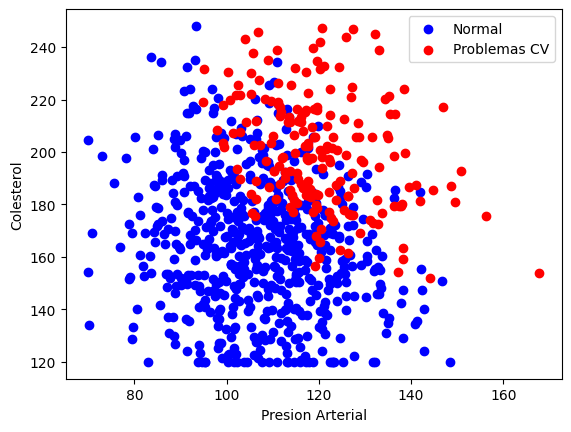

In [39]:
plt.scatter(dataset.presion_arterial[dataset.y == 0],dataset.colesterol[dataset.y == 0],label="Normal",color="Blue")
plt.scatter(dataset.presion_arterial[dataset.y == 1],dataset.colesterol[dataset.y == 1],label="Problemas CV",color="Red")
plt.xlabel("Presion Arterial")
plt.ylabel("Colesterol")
plt.legend()
plt.show()

Observamos en esta gráfica que predominan las personas sin problemas CV. Sin embargo, existen una gran cantidad de ellas con problemas:

In [40]:
print("Numero de personas normales:",len(dataset.y[dataset.y == 0]))
print("Numero de personas con CV:",len(dataset.y[dataset.y == 1]))

Numero de personas normales: 607
Numero de personas con CV: 193


Además, observando la gráfica, observamos que las personas con problemas CV suelen tener valores de presion arterial mayores a 115-120 y colesterol mayor a 175-180.

In [42]:
print("Numero de personas  con presion arterial >= 115 y colesterol >= 180", len(dataframe[(dataframe['Presion Arterial'] >= 115) & (dataframe['Colesterol'] >= 180)]))

Numero de personas presion arterial >= 115 118


Obviamente, no son todas pues hay excepciones; sin embargo, representan una cantidad considerble de las 193 con problemas CV y, a priori, estas dos métricas podrían utilizarse para poder determinar si una persona tiene problemas de CV o no

# Apartado 5

En este apartado entrenamos un modelo de Regresion Lógistica. El modelo es un atributo que pertenece a la clase Data

In [12]:
#Entrenamos el modelo
dataset.modelo.fit(dataset.x,dataset.y)

LogisticRegression()

# Apartado 6

Definimos una funcion para poder representar los datos y la curva de regresión

In [13]:
def dibujar_grafica(dataset):
  #Definimos el espacio completo o el plano donde estarán contenidos nuestros puntos
  x = np.linspace(dataset.presion_arterial.min(), dataset.presion_arterial.max(), 100)
  y = np.linspace(dataset.colesterol.min(), dataset.colesterol.max(), 100)
  X,Y = np.meshgrid(x, y)

  #Generamos todas las combinaciones posibles de puntos en dicho plano
  points = np.c_[X.flatten(),Y.flatten(), np.ones_like(X.flatten()) * 0.5] #Como nuestro modelo esta entrenado en 3D fijamos la componente Z

  #Calculamos las probabilidades de cada punto para poder determinar las regiones
  prob = dataset.modelo.predict_proba(points)[:,1] #Nos quedamos solo con la primera columna
  prob = prob.reshape(X.shape) #Le damos forma  correcta para aplicar despues: "paquetes de 100"


  plt.contourf(X,Y,prob,levels=[0,0.5,1], colors=["blue", "red"], alpha=0.3)
  plt.scatter(dataset.presion_arterial[dataset.y == 0],dataset.colesterol[dataset.y == 0],label="Normal",color="Blue")
  plt.scatter(dataset.presion_arterial[dataset.y == 1],dataset.colesterol[dataset.y == 1],label="Problemas CV",color="Red")
  plt.xlabel("Presion Arterial")
  plt.ylabel("Colesterol")
  plt.legend()
  plt.show()

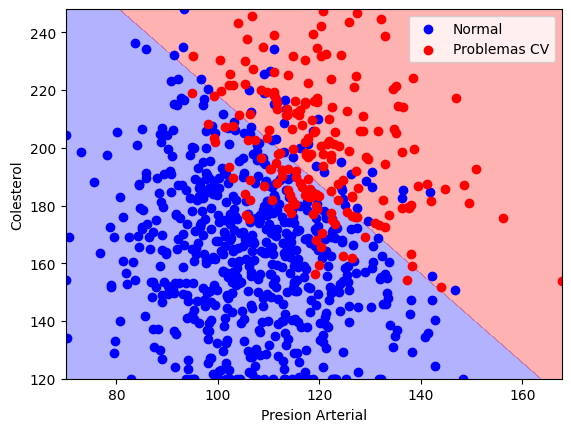

In [14]:
dibujar_grafica(dataset)

A partir de la visualización, se pueden destacar los siguientes puntos:

- La frontera parece lineal, pues tenemos una recta con pendiente negativa
- Existe cierto solapamiento de clases, lo que indica que los datos no son perfectamente separables, es decir, la clasificación no es perfecta, ya que algunos puntos rojos aparecen en la región azul y viceversa, lo que sugiere que el modelo tiene cierta incertidumbre en los límites de decisión.
- Respecto a la distribución de datos se observa una tendencia en la que valores más altos de presión arterial y colesterol están más asociados con la categoría de "Problemas CV".

Creemos que en caso de querer mejorar el modelo, y tener un mejor criterior para poder clasificar los datos en conjuntos disjuntos, se podría añadir más características relevantes.Además, sería conveniente poder utilizar datos reales pues tenemos que tener en cuenta que los datos son ficticios y es posible que se hayan generado instancias con datos irreales que conplican el entrenamiento y el entendimiento del modelo

# Apartado 7
Para este apartado generamos un nuevo dataset y aplicamos el mismo proceso que con el inicial para poder comparar resultados


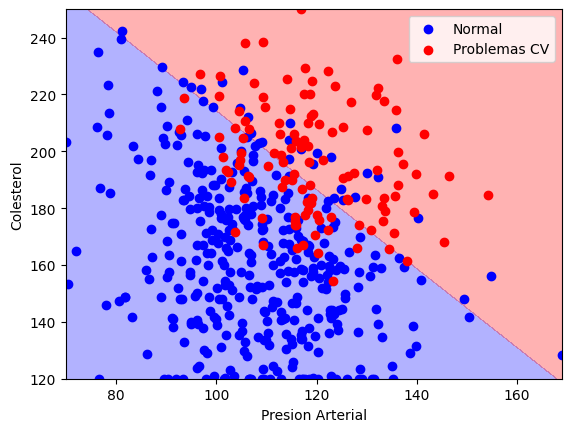

In [15]:
#Generamos datos
dataset_nuevo = Data(num_instancias=500)
dataset_nuevo.generar_datos()

#Normalizamos los datos y calculamos las probabilidades
dataset_nuevo.scaler.fit(dataset_nuevo.x)
dataset_nuevo.x_normalizado = dataset_nuevo.scaler.transform(dataset_nuevo.x)
dataset_nuevo.probabilidades = np.prod(dataset_nuevo.x_normalizado, axis=1)

#Definimos el umbral con el mismo metodo
persona_media_nuevo = np.array([110,170,np.mean(dataset_nuevo.frecuencia_deporte)]).reshape(1, -1) #persona media
persona_media_nuevo = dataset_nuevo.scaler.transform(persona_media_nuevo)

umbral_nuevo = np.prod(persona_media_nuevo)
umbral_nuevo += umbral_nuevo/2

#Clasificamos las 500 instancias
dataset_nuevo.y = (dataset_nuevo.probabilidades >= umbral_nuevo).astype(int)


#Entrenamos el modelo
dataset_nuevo.modelo.fit(dataset_nuevo.x,dataset_nuevo.y)
dibujar_grafica(dataset_nuevo)



Observamos lo siguiente:

- La frontera de decisión sigue siendo lineal
- Existe cierto solapamiento de clases, aunque parece haber una mejor separación en comparación con la imagen anterior.Sin embargo, la clasificación aún presenta errores, pero hay una menor cantidad de puntos rojos en la zona azul y viceversa, lo que sugiere una ligera mejora en la separación.
- Se mantiene la tendencia de que valores más altos de presión arterial y colesterol están más asociados con la categoría de "Problemas CV".


Teniendo en cuenta ambas imagenes , vemos que una de las principales diferencias es el numero de puntos. En este caso el numero de personas con problemas CV ha reducido.

Por otro lado, la frontera de decisión sigue siendo una recta en ambos casos, aunque en la primera imagen tiene una pendiente mayor.

Más allá de estos aspectos, no se observan diferencias significativas. Esto probablemente se deba a la forma en que los datos fueron generados: en ambos casos siguen una distribución normal, con la única variación en el número de instancias.